# Wikimedia Commons Featured Picture Exif

This is a simplistic scraper and crawler that extracts exif data from featured picture categories on commons and puts them into a sqlite database.

In [16]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sqlalchemy import create_engine
    
engine = create_engine('sqlite:///data/commons.db')
df = pd.read_sql('''
SELECT
    count(*) as photo_count,
    camera_make
FROM photos
WHERE
    camera_make is not null
GROUP BY
    camera_make
HAVING
    photo_count > 25
ORDER BY
    photo_count DESC;
''', engine)

df.head()

photo_count            camera_make
0         4617                  canon
1         2819      nikon corporation
2          714                   sony
3          395              panasonic
4          318  olympus imaging corp.

<AxesSubplot:xlabel='camera_make'>

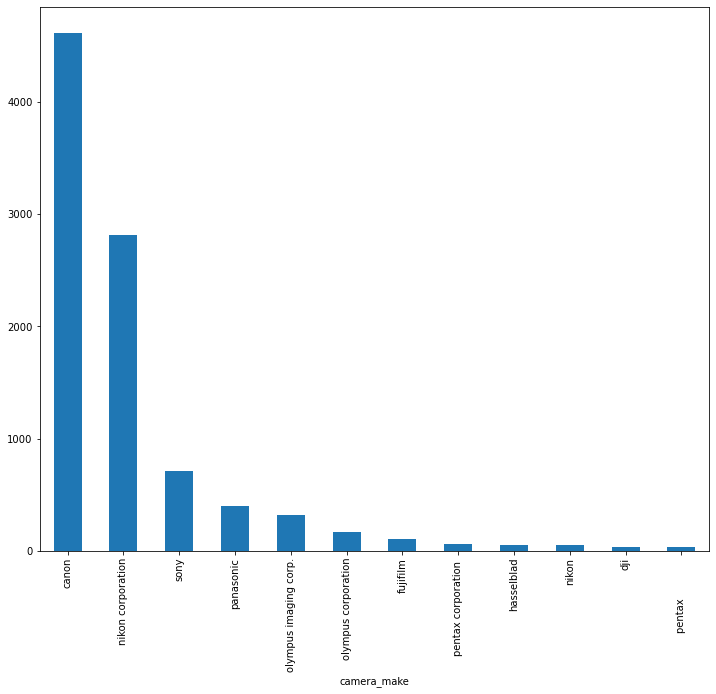

In [17]:
df.set_index('camera_make')['photo_count'].plot(kind='bar', figsize=(12,10))

# How many Apple photos are in the set?

<AxesSubplot:xlabel='camera_maker'>

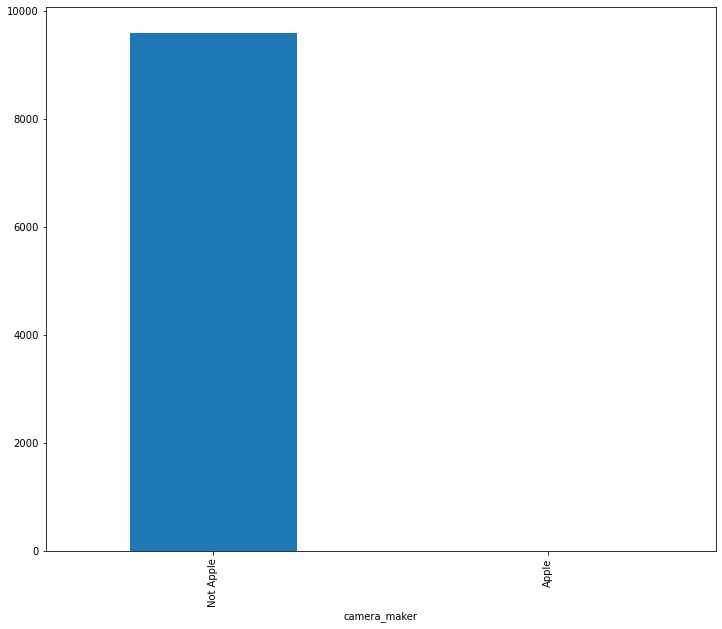

In [18]:
df = pd.read_sql('''
SELECT
    count(*) as photo_count,
    CASE camera_make
        WHEN 'apple'
            THEN 'Apple'
        ELSE 'Not Apple'
    END camera_maker
FROM photos
WHERE
    camera_make is not null
GROUP BY
    camera_maker
ORDER BY
    photo_count DESC;
''', engine)

df.set_index('camera_maker')['photo_count'].plot(kind='bar', figsize=(12,10))

## Popular Nikon lenses for Animal photos

In [20]:
df = pd.read_sql('''
select count(*) as count, lens
from photos
where lens is not null
    and camera_make like '%nikon%'
    and category like 'Animals%'
group by lens having count > 10
order by count desc;
''', engine)

df.head()

count                                        lens
0     65                              105.0 mm f/2.8
1     17  tamron sp af 90mm f2.8 di macro 1:1 272nii
2     15                              150.0 mm f/2.8
3     13                               90.0 mm f/2.8
4     13                    150.0-600.0 mm f/5.0-6.3